In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
import UnicycleModel
import UnicycleCost
import UnicycleConstraints
from scipy.integrate import solve_ivp
from PTR import PTR

In [3]:
ix = 3
iu = 2
ih = 2
N = 30
tf = 3
delT = tf/N
max_iter = 20

In [4]:
xi = np.zeros(3)
xi[0] = -2.0
xi[1] = -2.0 
xi[2] = 0

xf = np.zeros(3)
xf[0] = 2.0
xf[1] = 2.0
xf[2] = 0

myModel = UnicycleModel.unicycle('Hello',ix,iu,'numeric_central')
myCost = UnicycleCost.unicycle('Hello',ix,iu,N)
myConst = UnicycleConstraints.UnicycleConstraints('Hello',ix,iu)

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
# u0 = np.random.rand(N,iu)
u0 = np.zeros((N+1,iu))

In [7]:
i1 = PTR('unicycle',N,tf,max_iter,myModel,myCost,myConst,type_discretization="zoh",
          w_c=1,w_vc=1e3,w_tr=1e-1,w_rate=0,
         tol_vc=1e-6,tol_tr=1e-3)
x,u,xbar,ubar,total_num_iter,flag_boundary,l,l_vc,l_tr,x_traj,u_traj,T_traj = i1.run(x0,u0,xi,xf)


iteration   total_cost        cost        ||vc||     ||tr||       reduction   w_tr        bounary
1           4058.667          53.333      4           53.3        -3.06e+03   0.100       0(0.133)
2           101.001           93.381      2.19e-13    76.2        3.96e+03    0.100       0(0.14)
3           121.088           120.012     1.84e-12    10.8        -20.1       0.100       0(0.0742)
4           133.483           133.006     1.54e-13    4.78        -12.4       0.100       0(0.0186)
5           140.452           140.413     6.29e-14    0.386       -6.97       0.100       0(0.00206)
6           140.661           140.654     2.05e-12    0.0703      -0.209      0.100       1(0.000384)
7           140.750           140.749     1.66e-12    0.0138      -0.089      0.100       1(9.3e-05)
8           140.771           140.771     2.84e-13    0.00349     -0.0213     0.100       1(2.24e-05)
9           140.776           140.776     1.33e-12    0.000793    -0.00496    0.100       1(5.23e-0

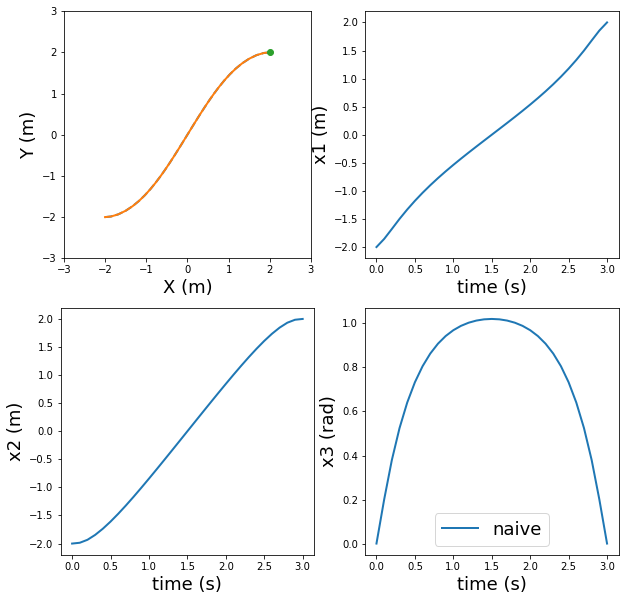

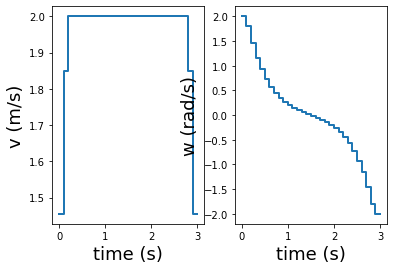

In [15]:
t_index = np.array(range(N+1))*delT

plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(x[:,0], x[:,1],'--', linewidth=2.0)
plt.plot(xbar[:,0], xbar[:,1],'-', linewidth=2.0)
plt.plot(xf[0],xf[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-3, 3, -3, 3])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(t_index, xbar[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(t_index, xbar[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(t_index, xbar[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
if i1.type_discretization == "zoh" :
    plt.step(t_index, [*ubar[:N,0],ubar[N-1,0]],alpha=1.0,where='post',linewidth=2.0)
elif i1.type_discretization == "foh" :
    plt.plot(t_index, ubar[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
if i1.type_discretization == "zoh" :
    plt.step(t_index, [*ubar[:N,1],ubar[N-1,1]],alpha=1.0,where='post',linewidth=2.0)
elif i1.type_discretization == "foh" :
    plt.plot(t_index, ubar[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()

In [ ]:
# from matplotlib.patches import Rectangle
# import imageio
# import os

In [ ]:
# filenames = []
# for i in range(N+1) :
#     fS = 18
#     fig = plt.figure(figsize=(10,10))
#     ax = fig.add_subplot(111)
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.plot(x[:i+1,0], x[:i+1,1], linewidth=2.0) 
#     plt.plot(xf[0], xf[1],'*', linewidth=2.0)
#     plt.plot(x[i,0], x[i,1],'*', linewidth=2.0) 
#     plt.plot(x[i,0], x[i,1], marker=(3, 0, x[i,2]*180/np.pi-90), markersize=20, linestyle='None')
# #     ax.add_patch(rec)
#     plt.axis([-3, 3, -3, 3])
#     plt.xlabel('X (m)', fontsize = fS)
#     plt.ylabel('Y (m)', fontsize = fS)

#     filename = '../images/{:d}.png'.format(i)
#     plt.savefig(filename)
#     filenames.append(filename)
#     plt.close()

In [ ]:
# with imageio.get_writer('../images/unicycle.gif', mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)
# for filename in set(filenames):
#     os.remove(filename)